In [26]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st

In [27]:
# Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2012-01-01')
# Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2012-01-01')
# Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2012-01-01')

# Grabbing a list of all SECTOR ETFS from https://etfdb.com/etfs/sector/ to keep it Standardized.
# Technology, Healthcare, Energy, Real Estate, Materials, Financials, Industrials, Utilities, Consumer Staples, Consumer Discretionary, Communication Services/Telecom.
# Are the main 11 Sectors in the US Economy.

# QQQ is already the Technology NASDAQ best fit.
# Import the XLK (Biggest Technology ETF Fund)
XLK = pdr.get_data_yahoo('XLK', start='2012-01-01')
# XLC (Communication Services/Telecom ETF)
XLC = pdr.get_data_yahoo('XLC', start='2012-01-01')
# XLY (Consumer Cyclical/Consumer Discretionary ETF)
XLY = pdr.get_data_yahoo('XLY', start='2012-01-01')
# XLP (Consumer Defensive/Consumer Staples ETF)
XLP = pdr.get_data_yahoo('XLP', start='2012-01-01')
# XLV (Healthcare ETF)
XLV = pdr.get_data_yahoo('XLV', start='2012-01-01')
# XLI (Industrials ETF)
XLI = pdr.get_data_yahoo('XLI', start='2012-01-01')
# XLF (Financials ETF)
XLF = pdr.get_data_yahoo('XLF', start='2012-01-01')
# VNQ (Real Estate ETF)
VNQ = pdr.get_data_yahoo('VNQ', start='2012-01-01')
# XLE (Energy ETF)
XLE = pdr.get_data_yahoo('XLE', start='2012-01-01')
# XLU (Utilities ETF)
XLU = pdr.get_data_yahoo('XLU', start='2012-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
# Not all Data is equal length. Might want to look for other ETFs to get longer span of Index.
# QQQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\QQQ.csv', index=False)
# SPY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\SPY.csv', index=False)
# VTI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VTI.csv', index=False)
# XLK.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLK.csv', index=False)
# XLC.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLC.csv', index=False)
# XLY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLY.csv', index=False)
# XLP.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLP.csv', index=False)
# XLV.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLV.csv', index=False)
# XLI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLI.csv', index=False)
# XLF.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLF.csv', index=False)
# VNQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VNQ.csv', index=False)
# XLE.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLE.csv', index=False)
# XLU.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLU.csv', index=False)

# folder = 'data'
# if not os.path.exists(folder):
#     os.makedirs(folder)

# files = ['QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
# file_paths = [f'{folder}/{file}.csv' for file in files]

# for file, file_path in zip(files, file_paths):
#     locals()[file].to_csv(file_path, index=True)

In [29]:
XLV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,35.099998,35.259998,35.029999,35.139999,29.261154,18864300
2012-01-04 00:00:00-05:00,35.110001,35.130001,34.849998,34.970001,29.119602,6174000
2012-01-05 00:00:00-05:00,34.779999,35.110001,34.709999,35.070000,29.202877,5939700
2012-01-06 00:00:00-05:00,35.119999,35.209999,34.959999,35.130001,29.252832,6762500
2012-01-09 00:00:00-05:00,35.200001,35.220001,34.910000,35.189999,29.302792,10695300


In [30]:
# Show that that DataFrame SPY imported OK
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,127.760002,128.380005,127.430000,127.500000,103.596176,193697900
2012-01-04 00:00:00-05:00,127.199997,127.809998,126.709999,127.699997,103.758690,127186500
2012-01-05 00:00:00-05:00,127.010002,128.229996,126.430000,128.039993,104.034935,173895000
2012-01-06 00:00:00-05:00,128.199997,128.220001,127.290001,127.709999,103.766800,148050000
2012-01-09 00:00:00-05:00,128.000000,128.179993,127.410004,128.020004,104.018684,99530200


In [31]:
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800
2023-02-01 00:00:00-05:00,405.209991,413.670013,402.350006,410.799988,410.799988,101459200
2023-02-02 00:00:00-05:00,414.859985,418.309998,412.880005,416.779999,416.779999,101654500
2023-02-03 00:00:00-05:00,411.589996,416.970001,411.089996,412.350006,412.350006,94647400
2023-02-06 00:00:00-05:00,409.790009,411.290009,408.100006,409.829987,409.829987,60018500


In [32]:
# Show that that DataFrame QQQ imported OK
QQQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,56.910000,57.189999,56.750000,56.900002,51.284267,39514100
2012-01-04 00:00:00-05:00,56.810001,57.220001,56.560001,57.139999,51.500587,29403400
2012-01-05 00:00:00-05:00,57.020000,57.660000,56.799999,57.610001,51.924202,41260600
2012-01-06 00:00:00-05:00,57.619999,57.939999,57.400002,57.810001,52.104465,46325200
2012-01-09 00:00:00-05:00,57.959999,57.980000,57.430000,57.619999,51.933216,39195500


In [33]:
QQQ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31 00:00:00-05:00,290.309998,294.720001,290.200012,294.619995,294.619995,46705100
2023-02-01 00:00:00-05:00,294.410004,303.429993,292.299988,300.920013,300.920013,67562200
2023-02-02 00:00:00-05:00,307.570007,313.679993,306.730011,311.720001,311.720001,83070600
2023-02-03 00:00:00-05:00,304.940002,312.390015,304.540009,306.179993,306.179993,76110300
2023-02-06 00:00:00-05:00,303.510010,305.910004,302.220001,303.589996,303.589996,40684100


In [34]:
# Show that that DataFrame VTI imported OK
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400
2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293552,1647400
2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530434,1146300
2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407902,1640000
2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530434,1978900


In [35]:
VTI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31 00:00:00-05:00,201.649994,204.490005,201.449997,204.429993,204.429993,4827600
2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600
2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3730800
2023-02-03 00:00:00-05:00,207.509995,210.179993,207.039993,207.839996,207.839996,2853500
2023-02-06 00:00:00-05:00,206.410004,207.070007,205.500000,206.279999,206.279999,2840200


In [36]:
#QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU'

VTI = VTI.reset_index()
QQQ = QQQ.reset_index()
SPY = SPY.reset_index()
XLK = XLK.reset_index()
XLC = XLC.reset_index()
XLY = XLY.reset_index()
XLP = XLP.reset_index()
XLV = XLV.reset_index()
XLI = XLI.reset_index()
XLF = XLF.reset_index()
VNQ = VNQ.reset_index()
XLE = XLE.reset_index()
XLU = XLU.reset_index()


In [37]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
XLK["Ticker"] = "XLK"
XLC["Ticker"] = "XLC"
XLY["Ticker"] = "XLY"
XLP["Ticker"] = "XLP"
XLV["Ticker"] = "XLV"
XLI["Ticker"] = "XLI"
XLF["Ticker"] = "XLF"
VNQ["Ticker"] = "VNQ"
XLE["Ticker"] = "XLE"
XLU["Ticker"] = "XLU"

VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400,VTI
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293552,1647400,VTI
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530434,1146300,VTI
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407902,1640000,VTI
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530434,1978900,VTI


In [38]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,56.910000,57.189999,56.750000,56.900002,51.284267,39514100,QQQ
1,2012-01-04 00:00:00-05:00,56.810001,57.220001,56.560001,57.139999,51.500587,29403400,QQQ
2,2012-01-05 00:00:00-05:00,57.020000,57.660000,56.799999,57.610001,51.924202,41260600,QQQ
3,2012-01-06 00:00:00-05:00,57.619999,57.939999,57.400002,57.810001,52.104465,46325200,QQQ
4,2012-01-09 00:00:00-05:00,57.959999,57.980000,57.430000,57.619999,51.933216,39195500,QQQ


In [39]:
XLU.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,36.180000,36.250000,35.230000,35.340000,24.239737,19184900,XLU
1,2012-01-04 00:00:00-05:00,35.240002,35.450001,35.130001,35.139999,24.102560,5775100,XLU
2,2012-01-05 00:00:00-05:00,35.099998,35.320000,34.910000,35.209999,24.150574,12110000,XLU
3,2012-01-06 00:00:00-05:00,35.270000,35.299999,34.980000,35.020000,24.020254,7305500,XLU
4,2012-01-09 00:00:00-05:00,35.130001,35.200001,34.910000,35.070000,24.054544,4527300,XLU


In [40]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI, XLK, XLC, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU])
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
1054,2016-03-14 00:00:00-04:00,102.879997,103.320000,102.690002,103.070000,91.109589,2987100,VTI
770,2015-01-27 00:00:00-05:00,48.990002,49.439999,48.889999,49.180000,37.803711,8746000,XLU
897,2015-07-29 00:00:00-04:00,70.290001,71.500000,70.070000,71.430000,51.818302,23427300,XLE
1480,2017-11-17 00:00:00-05:00,63.669998,63.720001,63.310001,63.349998,59.596462,8302100,XLK
796,2015-03-05 00:00:00-05:00,83.099998,83.949997,83.050003,83.129997,60.582687,3503900,VNQ
1361,2017-06-01 00:00:00-04:00,91.279999,91.910004,91.010002,91.910004,86.404770,5147500,XLY
554,2014-03-19 00:00:00-04:00,42.880001,43.000000,42.380001,42.590000,33.582203,10676900,XLP
1732,2018-11-19 00:00:00-05:00,166.699997,166.899994,161.539993,162.059998,157.445129,67280500,QQQ
732,2014-12-01 00:00:00-05:00,105.720001,105.919998,104.419998,104.809998,97.881584,35969500,QQQ
445,2013-10-10 00:00:00-04:00,77.809998,78.790001,77.790001,78.610001,72.345245,48062700,QQQ


In [41]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

13


In [42]:
data.value_counts

<bound method DataFrame.value_counts of                           Date        Open        High         Low  \
0    2012-01-03 00:00:00-05:00  127.760002  128.380005  127.430000   
1    2012-01-04 00:00:00-05:00  127.199997  127.809998  126.709999   
2    2012-01-05 00:00:00-05:00  127.010002  128.229996  126.430000   
3    2012-01-06 00:00:00-05:00  128.199997  128.220001  127.290001   
4    2012-01-09 00:00:00-05:00  128.000000  128.179993  127.410004   
...                        ...         ...         ...         ...   
2787 2023-01-31 00:00:00-05:00   68.769997   69.110001   67.959999   
2788 2023-02-01 00:00:00-05:00   68.760002   69.699997   68.269997   
2789 2023-02-02 00:00:00-05:00   69.250000   70.129997   68.709999   
2790 2023-02-03 00:00:00-05:00   68.739998   69.010002   67.000000   
2791 2023-02-06 00:00:00-05:00   67.660004   68.550003   67.540001   

           Close   Adj Close     Volume Ticker  
0     127.500000  103.596176  193697900    SPY  
1     127.699997  103

In [43]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,34671.000000,34671.000000,34671.000000,34671.000000,34671.000000,3.467100e+04
mean,96.318573,96.938931,95.641868,96.329165,88.388573,2.329877e+07
std,76.108563,76.606182,75.549640,76.114113,75.199539,3.292627e+07
min,10.706742,10.844842,10.658002,10.804224,8.771105,1.660000e+04
25%,51.164999,51.485001,50.869999,51.215000,44.224514,5.403750e+06
50%,73.029999,73.510002,72.489998,73.029999,63.288647,1.033370e+07
75%,108.779999,109.339996,108.150002,108.800003,102.505848,2.525010e+07
max,479.220001,479.980011,476.059998,477.709991,470.083679,5.072443e+08


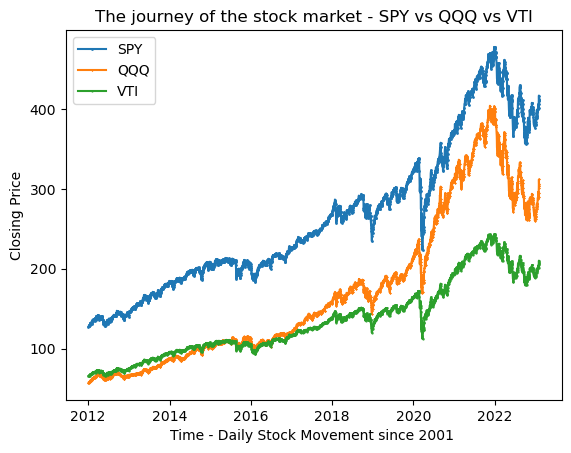

In [44]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34671 entries, 0 to 2791
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Date       34671 non-null  datetime64[ns, America/New_York]
 1   Open       34671 non-null  float64                         
 2   High       34671 non-null  float64                         
 3   Low        34671 non-null  float64                         
 4   Close      34671 non-null  float64                         
 5   Adj Close  34671 non-null  float64                         
 6   Volume     34671 non-null  int64                           
 7   Ticker     34671 non-null  object                          
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


In [46]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date         34671
Open         34671
High         34671
Low          34671
Close        34671
Adj Close    34671
Volume       34671
Ticker       34671
dtype: int64

In [47]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ    111171779800
SPY    281102060300
VNQ     12464993900
VTI      8599796200
XLC      5073842400
XLE     54210553800
XLF    162889195337
XLI     32627851900
XLK     28716607900
XLP     31039739000
XLU     38120556300
XLV     25934500800
XLY     15840079800
Name: Volume, dtype: int64

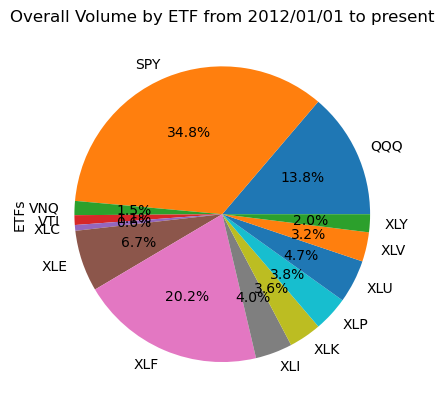

In [53]:
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, shadow=False)
plt.title("Overall Volume by ETF from 2012/01/01 to present")
plt.ylabel("ETFs")
plt.show()